In [2]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
4. Analysis of the best fit models from the sections 2 and 3, to see if using data from the same geographic area results in a better model.

In [8]:
infile = 'jma_nitrate.csv'

jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variable, if that is what you called it, example:
jma_df.head()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277


In [9]:
#Import the jma nitrate file, then get columns I want for training

infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile, sep = (','))
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[['sal','theta']]
y = nitratefilefiltered['nitrate']
print(np.shape(X))
print(np.shape(y))

# split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

(15574, 2)
(15574,)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved,max_iter=500,random_state=4)
        mlp.fit(X_train,y_train)
        trainres = mlp.score(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test,y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved = []
print(results)


c:\Users\moores4\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[7, 7, 0.9161892172590075, 0.921873493720573], [7, 8, 0.9166345013698309, 0.9223348247065539], [7, 9, 0.9203707841381941, 0.9260995717662199], [8, 7, 0.8715443070365818, 0.8781267088416057], [8, 8, 0.9174368723714074, 0.9225849820313412], [8, 9, 0.9185028906864442, 0.9244638312484061], [9, 7, 0.9136378986340906, 0.918948998329131], [9, 8, 0.9143969315525691, 0.9200369365615868], [9, 9, 0.921480750980364, 0.9276774546933304]]


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


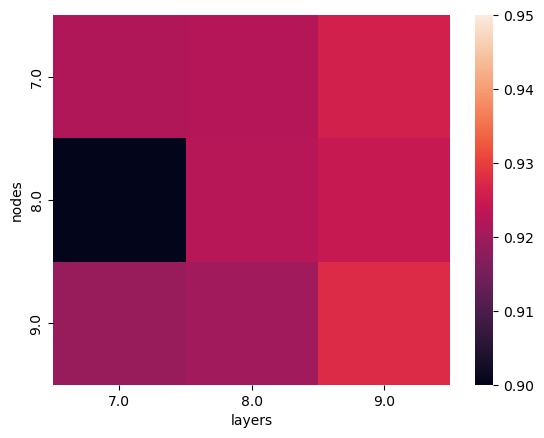

In [16]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index="nodes", columns="layers", values="Z")
ax = sns.heatmap(data_pivoted,vmin=0.9, vmax=0.95)
plt.show()